## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 6: Fourier Analysis
## Due November 29, 2020 by 11:59 PM
### <span style="color: red">Mayank Kumar</span>

Copyright &copy; 2020, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date. The grading penalty is 10% of the grade that you would otherwise receive for each day, or part of the day, that you are late.

### 0. Warmup (Do not turn in)

- Make sure you download, read, and run the notebook for lecture 7. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Fourier Analysis. 
- If you would like more resources, the following book is a good place to start. It is actually the notes used to teach intro signal processing at Stanford. Most of the material I covered in class is in these notes, plu a whole lot more.
> Osgood, [Lecture notes for EE 261](
https://see.stanford.edu/materials/lsoftaee261/book-fall-07.pdf).
- A more advanced and concise treatment of the subject is in the following book.
> Stein and Shakarchi, [Fourier Analysis: An Introduction](https://www.amazon.com/Fourier-Analysis-Introduction-Princeton-Lectures/dp/069111384X/ref=sr_1_1?keywords=stein+and+shakarchi+fourier&qid=1572974320&sr=8-1).

In [17]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from matplotlib.ticker import MaxNLocator # to make integer ticks on x axis

### 1. Exponential form of Complex Numbers

Express each of the following complex numbers in the form $r e^{i\theta}$. Do this by hand (or in Latex) and check your work with Python.

$$0$$
$$1$$
$$-1$$
$$i$$
$$1-2i$$
$$-8+7i$$

___
### Answer to question 1
Every complex can be represented as per below representation, 
$$
a + bi = |z| ( \cos \theta + i \sin \theta )
$$

where 

$$
|z| = \sqrt{a^2+b^2}
$$

is the **magnitude** of $z$ and 

$$
\theta = \arctan(b,a)
$$
is called the **argument** of $z$, and is the angle that the vector $(a,b)^T$ makes with the real axis. 

Considering above representation, the numbers can be written as below: 

#### z = 0
\begin{eqnarray}
\left | z \right | & = & \sqrt{a^2+b^2} \\
                   & = & \sqrt{0^2+0^2} \\
                   & = & 0\\
\end{eqnarray}

\begin{eqnarray}
\theta & = & \arctan(b,a) \\
       & = & \arctan(0,0) \\
       & = & 0\\
\end{eqnarray}

$Z = 0$, can be represented as $Z = 0.e^{\iota 0}$ 

#### z = 1
\begin{eqnarray}
\left | z \right | & = & \sqrt{a^2+b^2} \\
                   & = & \sqrt{1^2+0^2} \\
                   & = & 1\\
\end{eqnarray}

\begin{eqnarray}
\theta & = & \arctan(b,a) \\
       & = & \arctan(0,1) \\
       & = & 0\\
\end{eqnarray}

$Z = 1$, can be represented as $Z = 1.e^{\iota 0}$
#### z = -1
\begin{eqnarray}
\left | z \right | & = & \sqrt{a^2+b^2} \\
                   & = & \sqrt{{-1}^2+0^2} \\
                   & = & 1\\
\end{eqnarray}

\begin{eqnarray}
\theta & = & \arctan(b,a) \\
       & = & \arctan(0,-1) \\
       & = & π\\
\end{eqnarray}
$Z = -1$, can be represented as $Z = 1.e^{\iota π}$

#### z = j
\begin{eqnarray}
\left | z \right | & = & \sqrt{a^2+b^2} \\
                   & = & \sqrt{0^2+i^2} \\
                   & = & 1\\
\end{eqnarray}

\begin{eqnarray}
\theta & = & \arctan(b,a) \\
       & = & \arctan(1,0) \\
       & = & \frac{π}{2}\\
\end{eqnarray}

$Z = \iota$, can be represented as $Z = 1.e^{\iota \frac{π}{2}}$
#### z = 1-2j
\begin{eqnarray}
\left | z \right | & = & \sqrt{a^2+b^2} \\
                   & = & \sqrt{1^2+(-2)^2} \\
                   & = & \sqrt{5}\\
\end{eqnarray}

\begin{eqnarray}
\theta & = & \arctan(b,a) \\
       & = & \arctan(-2,1) \\
       & = & -\arctan(2)\\
       & = & -63.434 \;deg\\
       & = & -1.107\;rad\\
       & = & -0.35π \; rad
\end{eqnarray}

$Z = 1-2\iota$, can be represented as $Z = \sqrt{5}.e^{-\iota 0.35π }$
#### z = -8+7j
\begin{eqnarray}
\left | z \right | & = & \sqrt{a^2+b^2} \\
                   & = & \sqrt{(-8)^2+(7)^2} \\
                   & = & \sqrt{113}\\
                   & = & 10.630\\
\end{eqnarray}

\begin{eqnarray}
\theta & = & \arctan(b,a) \\
       & = & \arctan(7,-8) \\
       & = & -\arctan(7,8) \\
       & = & -41.186 \;deg\\
       & = & -0.71883\;rad\\
       & = & -0.229π \; rad
\end{eqnarray}

$Z = -8+7\iota$, can be represented as $Z = 10.63.e^{-\iota 0.229π }$

In [18]:
## Using python to verify the above results 
## first and foremost "0"
x = 0
print('Absolute value of x = %d+%dj: '%(x.real,x.imag) , abs(x))
print('Argument for x = %d+%dj:' %(x.real,x.imag) , sm.arg(x) )
## Then comes "1"
x = 1
print('\nAbsolute value of x = %d+%dj: '%(x.real,x.imag) , abs(x))
print('Argument for x = %d+%dj:' %(x.real,x.imag) , sm.arg(x) )

## Then comes "-1"
x = -1
print('\nAbsolute value of x = %d+%dj: '%(x.real,x.imag) , abs(x))
print('Argument for x = %d+%dj:' %(x.real,x.imag) , sm.arg(x) )

## Then comes "i"
x = complex(0,1)
print('\nAbsolute value of x = %d+%dj: '%(x.real,x.imag) , abs(x))
print('Argument for x = %d+%dj:' %(x.real,x.imag) , sm.arg(x) )

## Then comes "1-2j"
x = complex(1,-2)
print('\nAbsolute value of x = %d%dj: '%(x.real,x.imag) , round(abs(x),3))
print('Argument for x = %d%dj:' %(x.real,x.imag) , sm.arg(x) )

## Then comes "-8+7j"
x = complex(-8,7)
print('\nAbsolute value of x = %d+%dj: '%(x.real,x.imag) , round(abs(x),3))
print('Argument for x = %d+%dj:' %(x.real,x.imag) , sm.arg(x) )

Absolute value of x = 0+0j:  0
Argument for x = 0+0j: nan

Absolute value of x = 1+0j:  1
Argument for x = 1+0j: 0

Absolute value of x = -1+0j:  1
Argument for x = -1+0j: pi

Absolute value of x = 0+1j:  1.0
Argument for x = 0+1j: pi/2

Absolute value of x = 1-2j:  2.236
Argument for x = 1-2j: -1.10714871779409

Absolute value of x = -8+7j:  10.63
Argument for x = -8+7j: -0.718829999621625 + pi


### 2. A Trigonometric Identity

The goal of this exercise is to find formulas for $\cos(\alpha+\beta)$ and $\sin(\alpha + \beta)$. in terms of $\sin\alpha$, $\sin\beta$, $\cos\alpha$, and $\cos\beta$.

a) First, express $e^{(\alpha+\beta)i}$ directly in terms of the $\sin$ and $\cos$ using Euler's formula.

b) Next, express $e^{(\alpha+\beta)i}$ as a product of two exponentials. Then convert each term in the product into $\sin$ and $\cos$ using Euler's formula. Expand the expression and group the terms in the real part and the imaginary part.

c) Equate the real parts and imaginary parts from (a) and (b).

### Answer to Question 2
#### Part (a)

$$e^{(\alpha+\beta)i} = \cos{(\alpha + \beta)} + i \sin{(\alpha + \beta)} $$

#### Part (b)
$$e^{(\alpha+\beta)i} = e^{\alpha i}. e^{\beta i} $$
$$e^{(\alpha+\beta)i} =\left(\cos{\alpha} + i\sin{\alpha} \right) . \left(\cos{\beta} + i\sin{\beta} \right) $$
$$= \cos{\alpha}.\cos{\beta} + i \cos{\alpha}.\sin{\beta} + i \sin{\alpha}.\cos{\beta} - \sin{\alpha}. \sin{\beta} $$

$$= \left(\cos{\alpha}.\cos{\beta}- \sin{\alpha}.\sin{\beta}\right) + i \left(\cos{\alpha}.\sin{\beta} +  \sin{\alpha}.\cos{\beta} \right)  $$


#### Part (c)
considering equation in Part (b), $$ e^{(\alpha+\beta)i} = \left(\cos{\alpha}.\cos{\beta}- \sin{\alpha}.\sin{\beta}\right) + i \left(\cos{\alpha}.\sin{\beta} +  \sin{\alpha}.\cos{\beta} \right)   $$

Also, equation in Part (a), $$e^{(\alpha+\beta)i} = \cos{(\alpha + \beta)} + i \sin{(\alpha + \beta)} $$

Considering both the equations, if we compare real and imaginary parts, we get 
$$ \cos{(\alpha + \beta)} + i \sin{(\alpha + \beta)} = \left(\cos{\alpha}.\cos{\beta}- \sin{\alpha}.\sin{\beta}\right) + i \left(\cos{\alpha}.\sin{\beta} +  \sin{\alpha}.\cos{\beta} \right)   $$

$$ \cos{(\alpha + \beta)} = \cos{\alpha}.\cos{\beta}- \sin{\alpha}.\sin{\beta}$$

$$ \sin{(\alpha + \beta)} =  \cos{\alpha}.\sin{\beta} +  \sin{\alpha}.\cos{\beta}  $$





### 3. Fourier Series Approximation

Similar to the example of the square wave done in class, find a Fourier Series approximation to the function

$$
f(t) = \left |cos(2\pi t) \right|
$$

which is a *rectified cosine*. Make sure you get the period of this function correct. Make a plot with three subplots for $N=5$, $N=10$, and $N=20$ showing better and better approximations.

#### Answer to Question 3
Periodicity $(T)$ of $f(t) = |cos(2πt)|$ is calculated as below: 

$$ T = \frac{\text{periodicity of} \cos(2πt)}{2} $$\
$$ \text{periodicity of} \cos(2πt) = \frac{2π}{2π} $$\
$$ \text{periodicity of} \cos(2πt) = 1 $$

$$ \therefore T = \frac{1}{2} $$

In [19]:
t = sm.symbols("t", real=True)
n = sm.symbols("n", integer=True, positive=True)
q = 2*sm.pi*sm.I*n*t
x = 2*sm.pi*n*t

T = sm.Rational(1,2)
A = sm.integrate((sm.cos(x)) * sm.exp(q),(t,-T/2,T/2))

print("Expression: ")
display(A), 
print("\nSimplified expression: ")
display(A.simplify())

Expression: 


       ⅈ⋅π⋅n      -ⅈ⋅π⋅n
1   ⅈ⋅ℯ        ⅈ⋅ℯ      
─ - ──────── + ─────────
4    8⋅π⋅n       8⋅π⋅n  


Simplified expression: 


1/4

Text(0, 0.5, '$f(t)$')

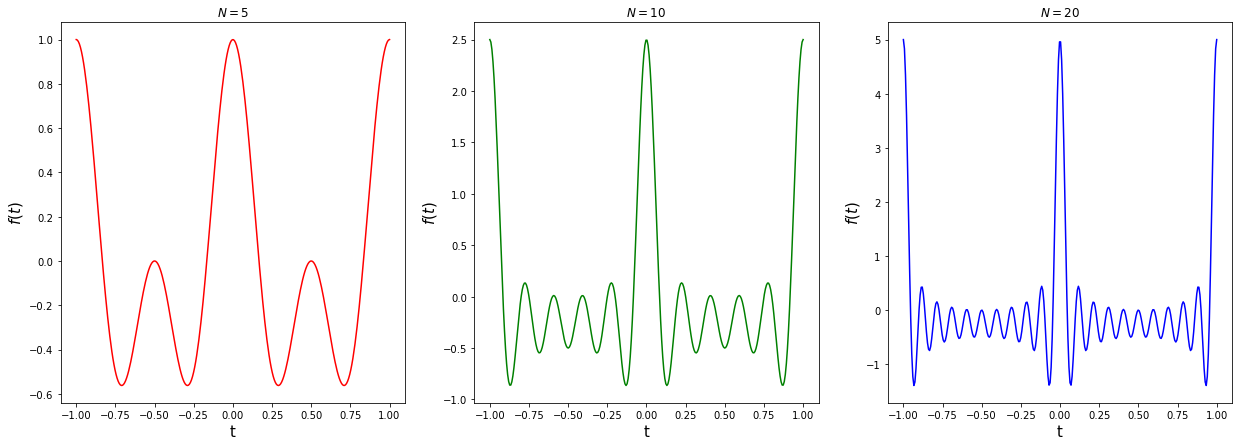

In [20]:
N1 = range(-2,3)   #5
N2 = range(-5,6)   #10
N3 = range(-10,11)   #10
expr = -2*sm.pi*sm.I*t
terms1 = [sm.Integer(0) if k == 0 else A.subs(n,k) * sm.exp(expr*k) for k in N1]
terms2 = [sm.Integer(0) if k == 0 else A.subs(n,k) * sm.exp(expr*k) for k in N2]
terms3 = [sm.Integer(0) if k == 0 else A.subs(n,k) * sm.exp(expr*k) for k in N3]

f1 = sum(terms1)
f2 = sum(terms2)
f3 = sum(terms3)
line1, line2, line3 = sm.plot(f1, f2, f3, (t,-1,1), show = False)

x1, y1 = line1.get_points()
x2, y2 = line2.get_points()
x3, y3 = line3.get_points()

fig = plt.figure(figsize = (21,7))
fig.add_subplot(131)
plt.plot(x1,y1, color = 'r')
plt.title("$N = 5$")
plt.xlabel('t', size = 15)
plt.ylabel('$f(t)$', size = 15)

fig.add_subplot(132)
plt.plot(x2,y2, color = 'g')
plt.title("$N = 10$")
plt.xlabel('t', size = 15)
plt.ylabel('$f(t)$', size = 15)

fig.add_subplot(133)
plt.plot(x3,y3, '-',color = 'b')
plt.title("$N = 20$")
plt.xlabel('t', size = 15)
plt.ylabel('$f(t)$', size = 15)


### 4. Orthogonality

Show that $\cos(2\pi t)$ and $\sin(2 \pi t)$ are orthogonal by showing that their inner product (a.k.a. dot product) is zero. Hint: Express the two functions in exponential form, and expand their product inside the integral.

On solving for euler representation, we get the following: 
$$
\cos \theta = \frac{e^{i\theta} + e^{-i \theta}}{2} .
$$

$$
\sin \theta = \frac{e^{i\theta} - e^{-i \theta}}{2i}.
$$

For $\theta = 2πt $
$$
\cos \theta = \frac{e^{i(2πt)} + e^{-i(2πt)}}{2} .
$$

$$
\sin \theta = \frac{e^{i(2πt)} - e^{-i(2πt)}}{2i}.
$$

For above dot product will be defined as, 
$$(f,g) = \int_0^1 f(t)\overline{g(t)} dt $$\
$$(\sin\theta,\cos\theta) = \int_0^1 \sin\theta. \overline{\cos\theta}. dt $$

substituting the value of $\sin \theta \text{and} \cos\theta $ in above equation, we have, 
$$ = \int_0^1 \frac{e^{i(2πt)} - e^{-i(2πt)}}{2i}. \overline{\frac{e^{i(2πt)} + e^{-i(2πt)}}{2}}. dt $$\
$$ = \int_0^1 \frac{e^{i(2πt)} - e^{-i(2πt)}}{2i}. \frac{\overline{e^{i(2πt)}} + \overline{e^{-i(2πt)}}}{2}. dt $$\
$$ = \int_0^1 \frac{e^{i(2πt)} - e^{-i(2πt)}}{2i}. \frac{e^{-i(2πt)} + e^{i(2πt)}}{2}. dt $$

as, $(a+b)(a-b) = a^2 - b^2$,
\begin{eqnarray}
& = & \int_0^1 \frac{e^{i(4πt)} - e^{-i(4πt)}}{4i}. dt \\
& = & \int_0^1 \frac{-\sin4πt}{2}. dt \\
& = & \left.\frac{\cos4πt}{2x 4π}\right|_0^1  \\
& = & \left.\frac{\cos4πt}{8π}\right|_0^1  \\
& = & \frac{\cos4π - cos0}{8π}  \\
& = & 0 
\end{eqnarray}

**As dot product of sin and cos is zero, we can say that they are orthogonal.** 

### 5. Fourier Transforms

Find the Fourier Transforms of the following functions. You can use `sympy`. 
Make sure to simplify, these shouldn't give complicated results. 

Plot original functions and their transforms in a nice 3 $\times$ 2 grid of plots. Label the sub plots.

$$
f(t) = \left \{ 
\begin{array}{l}
1 \;\mathrm{if} \;t \geq 0 \\
0 \;\mathrm{else}
\end{array}
\right .
$$

$$
f(t) = \frac{1}{1+t^2}
$$

$$
f(t) = e^{-\pi t^2}
$$

Function 1: 


⎧1  for t ≥ 0
⎨            
⎩0  otherwise

Fourier series of the function 1:


2⋅sin(π⋅t)   2⋅sin(3⋅π⋅t)   2⋅sin(5⋅π⋅t)   2⋅sin(7⋅π⋅t)   1
────────── + ──────────── + ──────────── + ──────────── + ─
    π            3⋅π            5⋅π            7⋅π        2

______________________________________________________________________________________________________

Function 2: 


  1   
──────
 2    
t  + 1

Fourier series of the function 2:


         1                           1                             1          
         ⌠                           ⌠                             ⌠          
         ⎮  cos(π⋅t)                 ⎮  cos(2⋅π⋅t)                 ⎮  cos(3⋅π⋅
cos(π⋅t)⋅⎮  ──────── dt + cos(2⋅π⋅t)⋅⎮  ────────── dt + cos(3⋅π⋅t)⋅⎮  ────────
         ⎮    2                      ⎮     2                       ⎮     2    
         ⎮   t  + 1                  ⎮    t  + 1                   ⎮    t  + 1
         ⌡                           ⌡                             ⌡          
         -1                          -1                            -1         

                   1                   
                   ⌠                   
t)                 ⎮  cos(4⋅π⋅t)      π
── dt + cos(4⋅π⋅t)⋅⎮  ────────── dt + ─
                   ⎮     2            4
                   ⎮    t  + 1         
                   ⌡                   
                   -1                  

______________________________________________________________________________________________________

Function 3: 


     2
 -π⋅t 
ℯ     

Fourier series of the function 3:


         1                                  1                                 
         ⌠                                  ⌠                                 
         ⎮       2                          ⎮       2                         
         ⎮   -π⋅t                           ⎮   -π⋅t                          
cos(π⋅t)⋅⎮  ℯ     ⋅cos(π⋅t) dt + cos(2⋅π⋅t)⋅⎮  ℯ     ⋅cos(2⋅π⋅t) dt + cos(3⋅π⋅
         ⌡                                  ⌡                                 
         -1                                 -1                                

   1                                    1                                
   ⌠                                    ⌠                                
   ⎮       2                            ⎮       2                        
   ⎮   -π⋅t                             ⎮   -π⋅t                  erf(√π)
t)⋅⎮  ℯ     ⋅cos(3⋅π⋅t) dt + cos(4⋅π⋅t)⋅⎮  ℯ     ⋅cos(4⋅π⋅t) dt + ───────
   ⌡                                    ⌡                            2   
  

Text(0, 0.5, '$f(s)$')

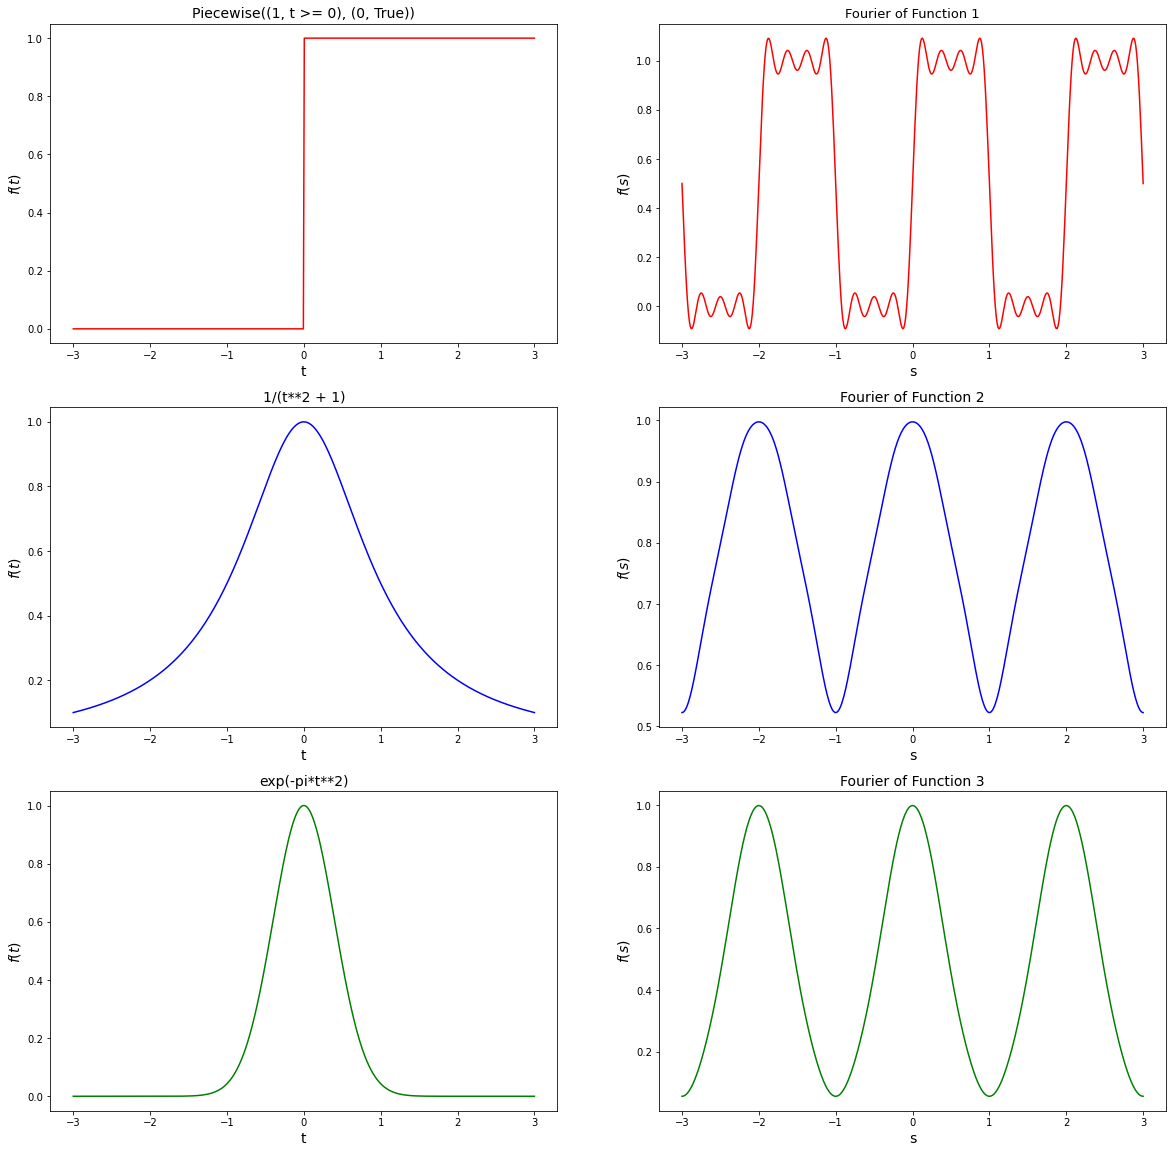

In [21]:
from sympy import lambdify, Piecewise, fourier_series
from sympy.abc import x

n = 5
## first function 
a = Piecewise((1, t >= 0), (0, t < 0), (0, True))
fn1 = lambdify(t, a)                       ## making piecewise funtion callable 
print('Function 1: ')
display(a)
s = fourier_series(a, (t, -1, 1))
print('Fourier series of the function 1:')
s = s.truncate(n=n)                       ## getting 6 terms from the series 
display(s.trigsimp())

expr1 = lambdify(t,s.trigsimp())

fig = plt.figure(figsize =(20,20))
x = np.linspace(-3,3, 500)
fig.add_subplot(3,2,1)
plt.plot(x, fn1(x), 'r')
plt.title(a, size = 14)
plt.xlabel('t', size = 14)
plt.ylabel('$f(t)$', size = 14)

fig.add_subplot(3,2,2)
plt.plot(x, expr1(x), 'r')
plt.title("Fourier of Function 1", size = 13)
plt.xlabel('s', size = 14)
plt.ylabel('$f(s)$', size = 14)

## second function 
b = 1/(1+t**2)
fn2 = lambdify(t,b)
print('______________________________________________________________________________________________________')
print('\nFunction 2: ')
display(b)
s2 = fourier_series(b, (t, -1, 1))
print('Fourier series of the function 2:')
s2 = s2.truncate(n=n)                       ## getting 6 terms from the series 
display(s2.simplify())
expr2 = lambdify(t,s2)

x = np.linspace(-3,3, 500)
fig.add_subplot(3,2,3)
plt.plot(x, fn2(x), 'b')
plt.title(b, size = 14)
plt.xlabel('t', size = 14)
plt.ylabel('$f(t)$', size = 14)

fig.add_subplot(3,2,4)
plt.plot(x, expr2(x), 'b')
plt.title("Fourier of Function 2", size = 14)
plt.xlabel('s', size = 14)
plt.ylabel('$f(s)$', size = 14)


## Third function 
c = sm.exp(-sm.pi*(t**2))
fn3 = lambdify(t,c)
print('______________________________________________________________________________________________________')
print('\nFunction 3: ')
display(c)
s3 = fourier_series(c, (t, -1, 1))
print('Fourier series of the function 3:')
s3 = s3.truncate(n=n)                       ## getting 6 terms from the series 
display(s3.simplify())
expr3 = lambdify(t,s3)

x = np.linspace(-3,3, 500)
fig.add_subplot(3,2,5)
plt.plot(x, fn3(x), 'g')
plt.title(c, size = 14)
plt.xlabel('t', size = 14)
plt.ylabel('$f(t)$', size = 14)

fig.add_subplot(3,2,6)
plt.plot(x, expr3(x), 'g')
plt.title("Fourier of Function 3", size = 14)
plt.xlabel('s', size = 14)
plt.ylabel('$f(s)$', size = 14)

### 6. Solve a system of ODEs

Similar to the ODE example in the notes, find a solution to the two differential equations

\begin{eqnarray}
\dot x & = & -y \\
\dot y & = & -x + u
\end{eqnarray}

a) First take the Fourier Transform of both equations. 

b) Solve for $Y(s)$ in terms of $U(s)$. 

c) Note that the solution for $Y(s)$ involves a function of $s$ times $U(s)$. Figure out the inverse Fourier Transform of that function. 

d) Use a convolution to figure out $y(t)$ in terms of $u(t)$. 

e) Find $X(s)$ in terms of $Y(s)$ and then $x(t)$ in terms of $y(t)$. 

___
#### Answer to Question 6
For the given set of differential equation, 

a) if we take fourier transform of both the equations, we will have 
$$ 2\pi\iota sX(s) = -Y(s) ...(1)$$
$$ 2\pi\iota sY(s) = -X(s) + U(s) ...(2)$$

**b) and c) and d)** solving for $Y(s)$, we will have, 
$$ 2\pi\iota sY(s) = \frac{Y(s)}{2\pi\iota s} + U(s) $$\
$$ 2\pi\iota sY(s) - \frac{Y(s)}{2\pi\iota s}=   U(s) $$\
$$ Y(s) \left(2\pi\iota s - \frac{1}{2\pi\iota s}\right) =   U(s) $$\
$$ Y(s) =   U(s) {\left(2\pi\iota s - \frac{1}{2\pi\iota s}\right)}^{-1} $$

from here, $$y(t) = u(t) * f(t)$$
where, $$ f(t) = \mathcal{F}^{-1} \left\{ {\left(2\pi\iota s - \frac{1}{2\pi\iota s}\right)}^{-1} \right\}$$

inverse fourier transform of the above equation will lead to, 
$$f(t) = \int_{-\infty}^{\infty}{ \left(2\pi\iota s - \frac{1}{2\pi\iota s}\right)}^{-1} e^{\iota2πst}ds $$\
$$f(t) = \int_{-\infty}^{\infty} { \frac{2\pi\iota s} {(2\pi\iota s)^2 - 1}} e^{\iota2πst}ds $$\
$$f(t) = \int_{-\infty}^{\infty} { \frac{2\pi\iota s} {(2\pi\iota s + 1) (2\pi\iota s - 1)}} e^{\iota2πst}ds $$

$$y(t) = \int_{-\infty}^{\infty} {\frac{ 2\pi\iota s} {2} \left(\frac{1} {(2\pi\iota s - 1)} - \frac{1}{(2\pi\iota s + 1)}\right)} e^{\iota2πst}ds $$

$$y(t) = \int_{-\infty}^{\infty} { \frac{ 2\pi\iota s} {2} \left(\frac{1} {(2\pi\iota s - 1)}\right)e^{\iota2πst}ds - \int_{-\infty}^{\infty}\frac{ 2\pi\iota s} {2} \left(\frac{1}{(2\pi\iota s + 1)}\right)} e^{\iota2πst}ds $$

If we rearrange the equation by writting $2\pi\iota s$ as $2\pi\iota s-1+1$ for first term and $2\pi\iota s+1-1$ for the second term. if we rewrite the terms we get, 

$$f(t) = \int_{-\infty}^{\infty} \frac{1}{2} \left(\frac{-1} {2\pi\iota s - 1}\right) e^{\iota2πst}ds + \int_{-\infty}^{\infty} \frac{1}{2} \left(\frac{1}{2\pi\iota s + 1}\right) e^{\iota2πst}ds $$

$$f(t) = f_1(t) + f_2(t)$$\
$$f_1(t) =  \frac{e^{\frac{-t}{2 π}} \theta(t)} {2 \sqrt{2 π}} $$\
$$f_2(t) =  \frac{e^{\frac{t}{2 π}} \theta(-t)} {2\sqrt{2 π}} $$\
$$f(t) = \frac{e^{\frac{-t}{2 π}} \theta(t)} {2 \sqrt{2 π}} + \frac{e^{\frac{t}{2 π}} \theta(-t)} {2\sqrt{2 π}} $$
where, $\theta(t)$ is heavyside stepwise function.
Therefore, $$y(t) = \left( \frac{e^{\frac{-t}{2 π}} \theta(t)} {2 \sqrt{2 π}} + \frac{e^{\frac{t}{2 π}} \theta(-t)} {2\sqrt{2 π}} \right) u(t)$$


**e) from (1),** 
$$ X(s) = - \frac{Y(s)}{2π \iota s}$$

$$
x(t) = g * y
$$

$$g(t) = \mathcal{F}^{-1}\left \{ -\frac{1}{2π \iota s} \right \} $$

inverse fourier transform of which is,
$$ g(t) = - \frac{sgn (t)}{4π}  $$
therefore, $$ x(t) = - \frac{sgn (t)}{4π} y(t) $$
where sgn(x) is signum function on x. 

In [22]:
from sympy import inverse_fourier_transform
from sympy.abc import s, t
a = inverse_fourier_transform(1/((2*sm.pi*sm.I*s) + 1), s,t )
a

                       ⎛     1           ⎞
InverseFourierTransform⎜───────────, s, t⎟
                       ⎝2⋅ⅈ⋅π⋅s + 1      ⎠

### 7.  Image Processing

Find a nice gray scale image to load, or use the Minion image from class. Call the resulting matrix $m$.

a) Render the image using `matplotlib`. 

b) Take the DFT of the image $m$ to get a matrix $M$. Then make a new matrix $M_\mathrm{new}$ in which each entry is just the magnitude of the corresponding entry in $M$. Create a new image from the inverse Fourier transform of this image and render it. 

c) Do the same thing, except set the entries in $M_\mathrm{new}$ to the angle of the entries in $M$. Create a new image from the inverse Fourier transform of this image and render it.

d) Do the same thing, except normalize all the entries in $M_\mathrm{new}$ to have magnitude 1. Create a new image from the inverse Fourier transform of this image and render it.

What might you conclude about the information contained in the magnitude of the transformed image? What might you conclude about the information contained in the angle?

Min: 1.0
Max: 1.0


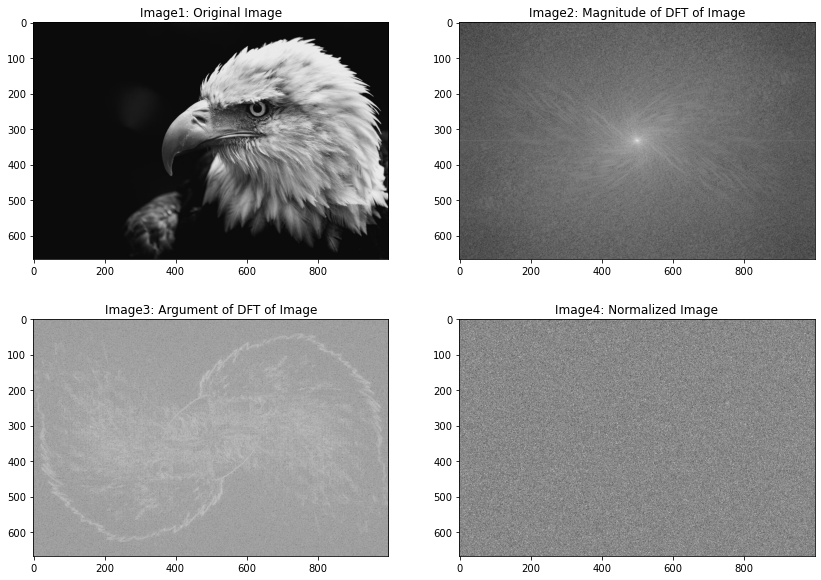

In [23]:
import imageio
# m = imageio.imread('cat_eye.jpg', as_gray=True)
m = imageio.imread('bird.jpeg', as_gray=True)

### part b: understand the "Magnitude" of the situation. 
M = np.fft.fft2(m)
M = np.fft.fftshift(M) # Shift it so the low frequencies are in the middle
Mnew = 20*np.log(np.abs(M))   # matrix of magnitudes

### part c: Arguments are good!
Marg = 20*np.abs(np.angle(M, deg = True))   # matrix of arguments
Marg = np.fft.fft2(Marg)
# Marg = np.fft.fftshift(Marg) # Shift it so the low frequencies are in the middle
Marg = 20*np.log(np.abs(Marg))

### part d : Normalize to value 1 
normM = M/abs(M)

### checking magnitude of min and max element of the matrix.
print('Min:',abs(np.amin(normM)))
print('Max:', abs(np.amax(normM)))

Mnorm = np.fft.fft2(normM)
Mnorm= np.fft.fftshift(normM) # Shift it so the low frequencies are in the middle
Mnorm = 20*np.log(np.abs(Mnorm))

fig, ax = plt.subplots(2,2,figsize=(14,10))
ax[0,0].imshow(m, cmap = 'gray'),ax[0,0].set_title("Image1: Original Image") ;                #a
ax[0,1].imshow(Mnew, cmap = 'gray'),ax[0,1].set_title("Image2: Magnitude of DFT of Image");     #b
ax[1,0].imshow(Marg, cmap = 'gray'),ax[1,0].set_title("Image3: Argument of DFT of Image")  ;      #c
ax[1,1].imshow(Mnorm, cmap = 'gray'),ax[1,1].set_title("Image4: Normalized Image")     ;      #d

**Interpretation of the images:** 
1. From Image2, data is stored in various frequencies but we can say that more data is low frequency data. 
2. High frequency contents are low in magnitude. 
3. There are no dominant direction in the image. 

4. Image3, contains information on phase present in the image. Each point can help understaning phase of patterns available in the image.
5. Here, phase is plotted without any shifting, and in this case it represent the phase available at each and every point of the image. 
